In [ ]:
    *----------------------------- Submission_Details ---------------------------*
    |                                                                            |
    |        Project Topic  = Milk Quality Prediction                            |
    |                                                                            |
    |        Name           = Ameer Moavia                                       |
    |                                                                            |
    |        Reg_no.        = FA20-BSE-107                                       |
    |                                                                            |
    |        Class          = BSE-7A                                             |
    |                                                                            |
    |        Instructor     = Dr. Tayyab Ch                                      |
    |                                                                            |
    *----------------------------------------------------------------------------*

# <center>Machine Learning Project</center>
## <center>Milk Quality Prediction</center>

## 1. Importing all the neccesary libraries

In [377]:
# Import Libraries

import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 2. Importing Data from the csv file

In [378]:
sample_data = pd.read_csv("milknew.csv")
print("\n\nSample Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data)



Sample Data:

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
5     6.6          37      1     1     1          1     255    high
6     5.5          45      1     0     1          1     250     low
7     4.5          60      0     1     1          1     250     low
8     8.1          66      1     0     1          1     255     low
9     6.7          45      1     1     0          0     247  medium
10    6.7          45      1     1     1          0     245  medium
11    5.6          50      0     1     1          1     255     low
12    8.6          55      0     1     1          1     255     low
13    7.4          90      1    

## 3. Encoding the 'Grade' column to numerical representation

In [379]:
# Transform Output of into Numerical Representation

pgrade = pd.DataFrame({"Grade":["high","medium","low"]})
pgrade_label_encoder = LabelEncoder()
pgrade_label_encoder.fit(np.ravel(pgrade))
sample_data["encoded_grade"] = pgrade_label_encoder.transform(sample_data['Grade'])
# high = 0,low = 1,medium = 2

In [380]:
print("\n\n Grade Attribute After Label Encoding:")
print("========================================\n")

data = sample_data[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
data['Grade'] = sample_data['encoded_grade']
print(data)



 Grade Attribute After Label Encoding:

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254      0
1     6.6          36      0     1     0          1     253      0
2     8.5          70      1     1     1          1     246      1
3     9.5          34      1     1     0          1     255      1
4     6.6          37      0     0     0          0     255      2
5     6.6          37      1     1     1          1     255      0
6     5.5          45      1     0     1          1     250      1
7     4.5          60      0     1     1          1     250      1
8     8.1          66      1     0     1          1     255      1
9     6.7          45      1     1     0          0     247      2
10    6.7          45      1     1     1          0     245      2
11    5.6          50      0     1     1          1     255      1
12    8.6          55      0     1     1          1     255      1
13    7.4          9

## 4. Splitting data for testing and training

In [381]:
training_data_encoded, testing_data_encoded = train_test_split(data , test_size=0.2 , random_state=0 , shuffle = False)
# sample_data = replaced the already Grade from Encoded grade coloumn. 
print('This is Training data')
print(training_data_encoded)
print('\nThis is testing data')
print(testing_data_encoded)

This is Training data
      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0    6.6          35      1     0     1          0     254      0
1    6.6          36      0     1     0          1     253      0
2    8.5          70      1     1     1          1     246      1
3    9.5          34      1     1     0          1     255      1
4    6.6          37      0     0     0          0     255      2
5    6.6          37      1     1     1          1     255      0
6    5.5          45      1     0     1          1     250      1
7    4.5          60      0     1     1          1     250      1
8    8.1          66      1     0     1          1     255      1
9    6.7          45      1     1     0          0     247      2
10   6.7          45      1     1     1          0     245      2
11   5.6          50      0     1     1          1     255      1
12   8.6          55      0     1     1          1     255      1
13   7.4          90      1     0     1          1    

## 5. Extracting Features and Labels

In [382]:
print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data_encoded.iloc[: , :-1]
input_vector_test = testing_data_encoded.iloc[: , :-1]
print(input_vector_train)

print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print("  Grade")
output_label_train = training_data_encoded.iloc[: ,-1]
output_label_test = testing_data_encoded.iloc[: ,-1]
print(output_label_train)



Inputs Vectors (Feature Vectors) of Training Data:

      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0    6.6          35      1     0     1          0     254
1    6.6          36      0     1     0          1     253
2    8.5          70      1     1     1          1     246
3    9.5          34      1     1     0          1     255
4    6.6          37      0     0     0          0     255
5    6.6          37      1     1     1          1     255
6    5.5          45      1     0     1          1     250
7    4.5          60      0     1     1          1     250
8    8.1          66      1     0     1          1     255
9    6.7          45      1     1     0          0     247
10   6.7          45      1     1     1          0     245
11   5.6          50      0     1     1          1     255
12   8.6          55      0     1     1          1     255
13   7.4          90      1     0     1          1     255
14   6.8          45      0     1     1          1     255
15

In [383]:
# Assuming you have your features (X) and labels (y) ready
X = data[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = data[['Grade']]
y = np.array(y)

In [384]:
accuracies = []
result = pd.DataFrame(columns=["Model", "Score", "K-Fold Mean Score"])

## 6. SVM Model

### 6.1 SVM Model By 20/80 Testing and Training approach

Accuracy Score:
0.958
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       1.00      0.98      0.99        82
           2       0.91      0.97      0.94        74

    accuracy                           0.96       212
   macro avg       0.96      0.95      0.95       212
weighted avg       0.96      0.96      0.96       212

Confusion Matrix:
[[51  0  5]
 [ 0 80  2]
 [ 2  0 72]]


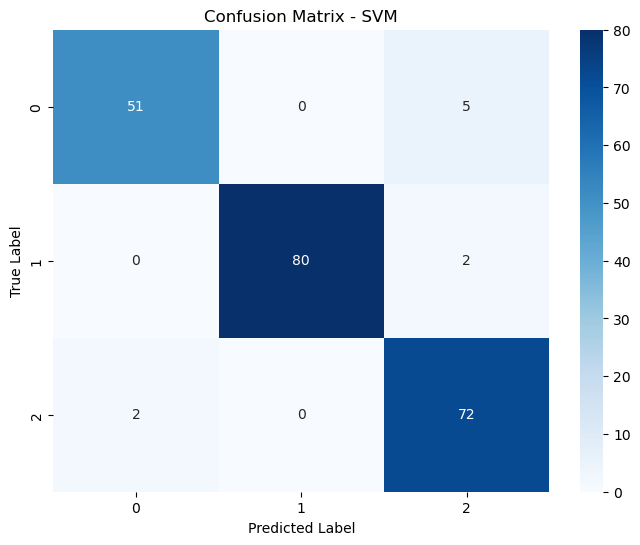

In [386]:
# SVM

model_name = 'SVM'
svc_model = svm.SVC(gamma='auto', random_state=0)
svc_model.fit(input_vector_train, np.ravel(output_label_train))

# Save the Model in a Pkl File
pickle.dump(svc_model, open('svc_trained_model.pkl', 'wb'))

model = pickle.load(open('svc_trained_model.pkl', 'rb'))

model_predictions = model.predict(input_vector_test)
testing_data_encoded.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data_encoded["Predictions"] = model_predictions
model_predictions = testing_data_encoded 

model_accuracy_score = accuracy_score(model_predictions["Grade"], model_predictions["Predictions"])
model_accuracy_score = round(model_accuracy_score, 3)
print("Accuracy Score:")
print(model_accuracy_score)

report = classification_report(model_predictions["Grade"], model_predictions["Predictions"])
print("Classification Report:")
print(report)

cm = confusion_matrix(model_predictions["Grade"], model_predictions["Predictions"])
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 6.2 SVM Model By K-Fold Approach

In [387]:
# Create an instance of the Support Vector Classifier
svc_model = svm.SVC(gamma='auto', random_state=0)

# Perform k-fold cross-validation
scores = cross_val_score(svc_model, X, np.ravel(y), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = scores.mean()
mean_accuracy = round(mean_accuracy, 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.94339623 0.95283019 0.96226415 0.95283019 0.96226415 0.95283019
 0.95283019 0.95283019 0.96226415 0.96190476]
Mean accuracy: 0.956


In [391]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, model_accuracy_score, mean_accuracy]

  Model  Score  K-Fold Mean Score
0   SVM  0.958              0.956


## 7. Random Forest Model

### 7.1 Random Forest Model By 20/80 Testing and Training approach

C:\Users\HP\AppData\Local\Temp\ipykernel_2624\1302862536.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy: 0.995

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
[[48  0  0]
 [ 1 77  0]
 [ 0  0 86]]


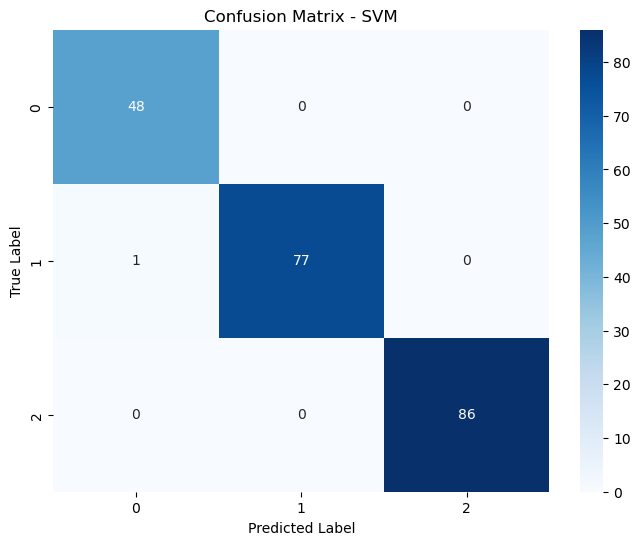

In [392]:
# Random Forest

model_name = 'Random Forest'

# Assuming X contains the features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 7.2 Random Forest Model By K-Fold Approach

In [393]:
# Perform k-fold cross-validation
scores = cross_val_score(rf_classifier, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.98113208 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean accuracy: 0.998


In [394]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 8. Naive Bayes Model

### 8.1 Naive Bayes Model By 20/80 Testing and Training approach

Accuracy:  0.962
Confusion Matrix:
[[12 16 20]
 [26 28 24]
 [23 32 31]]


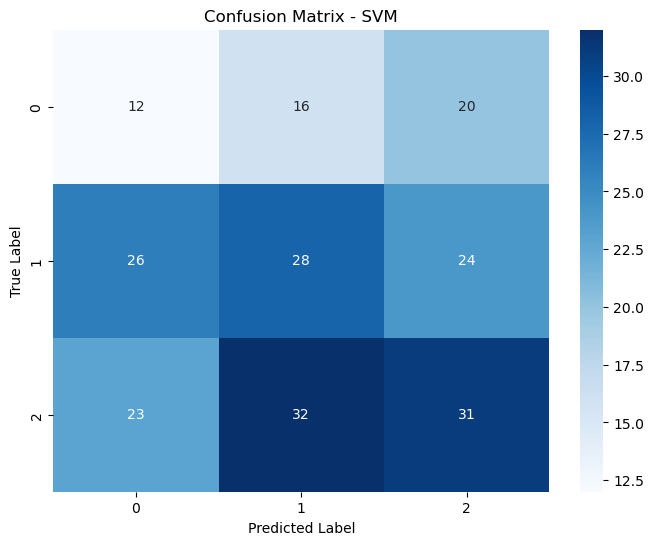

In [395]:
model_name = 'Naive Bayes'

# Assuming X_test contains the test features and y_true contains the true labels
X_test = input_vector_test    # Test features
y_true = output_label_test    # True labels

# Use the trained Naive Bayes classifier to make predictions on the test data
predictions = naive_bayes.predict(X_test)

# Calculate accuracy by comparing predicted labels with true labels
accuracy = round((predictions == y_true).mean(), 3)

# Print the accuracy
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 8.2 Naive Bayes Model By K-Fold Approach

In [396]:
# Define the number of folds for cross-validation
n_splits = 10

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=n_splits)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []
X = np.array(X)
y = np.array(y)
# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()
    
    # Train the classifier on the training data
    nb_classifier.fit(X_train, y_train.ravel())
    
    # Make predictions on the testing data
    y_pred = nb_classifier.predict(X_test)
    
    # Compute the accuracy score for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Compute the average accuracy across all folds
mean_accuracy = round(sum(accuracy_scores) / n_splits, 3)

# Print the average accuracy
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.926


In [397]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 9. MLP Model

### 9.1 MLP Model By 20/80 Testing and Training approach

Accuracy: 0.741

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.07      0.13        56
           1       0.66      1.00      0.80        81
           2       0.87      0.96      0.91        75

    accuracy                           0.74       212
   macro avg       0.70      0.68      0.61       212
weighted avg       0.71      0.74      0.66       212

Confusion Matrix:
[[ 4 41 11]
 [ 0 81  0]
 [ 3  0 72]]


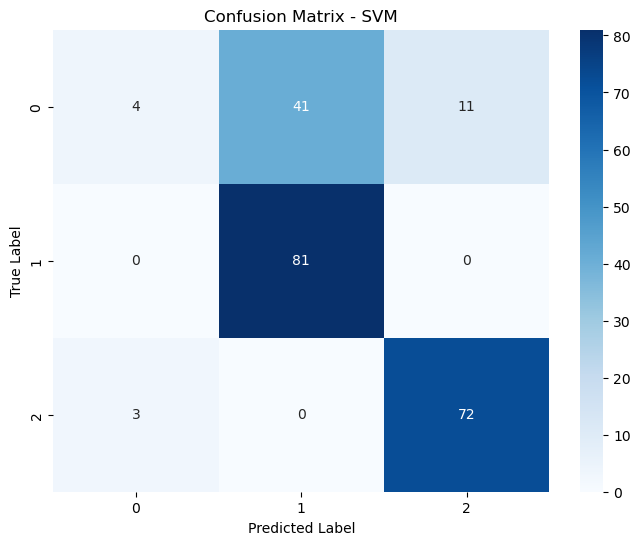

In [398]:
#MLP

model_name = 'MLP'
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2)

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
predictions = mlp.predict(X_test)

# Evaluate the model's performance (example: using accuracy)
accuracy = round(mlp.score(X_test, y_test.ravel()), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 9.2 Naive Bayes Model By K-Fold Approach

In [399]:
# Perform k-fold cross-validation
scores = cross_val_score(mlp, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.79245283 0.83018868 0.83018868 0.72641509 0.81132075 0.74528302
 0.77358491 0.75471698 0.76415094 0.75238095]
Mean accuracy: 0.778


In [400]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 10. Decision Tree Classifier Model

### 10.1 Decision Tree Classifier Model By 20/80 Testing and Training approach

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       429
           2       1.00      1.00      1.00       374

    accuracy                           1.00      1059
   macro avg       1.00      1.00      1.00      1059
weighted avg       1.00      1.00      1.00      1059

Confusion Matrix:
[[256   0   0]
 [  0 429   0]
 [  0   0 374]]


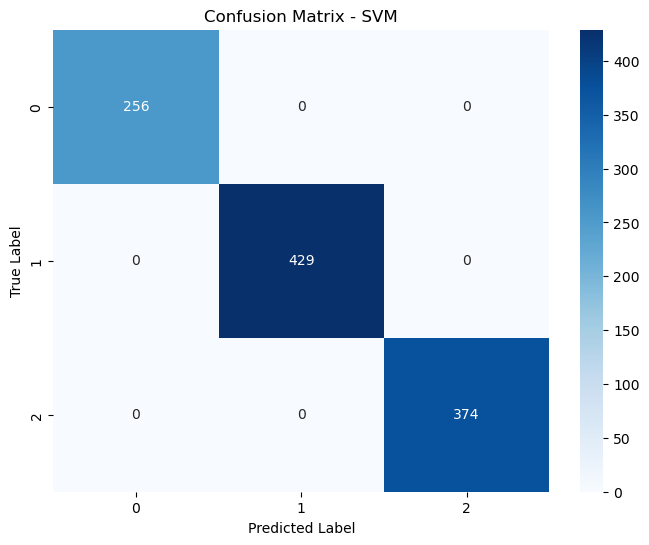

In [401]:
#ID3

model_name = 'ID3'

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y.ravel())

# Saving Model for making predictions by the user in the application phase
with open('id3_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
    
y_pred = clf.predict(X)
accuracy = round(accuracy_score(y.ravel(), y_pred), 3)
print("Accuracy:", accuracy)

report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 10.2 Naive Bayes Model By K-Fold Approach

In [402]:
# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.96226415 1.         1.         1.         1.         1.
 1.         1.         0.99056604 1.        ]
Mean accuracy: 0.995


In [403]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 11. XGB Model

### 11.1 XGB Model By 20/80 Testing and Training approach

Accuracy: 0.986

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       1.00      0.97      0.99        78
           2       0.98      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
[[47  0  1]
 [ 1 76  1]
 [ 0  0 86]]


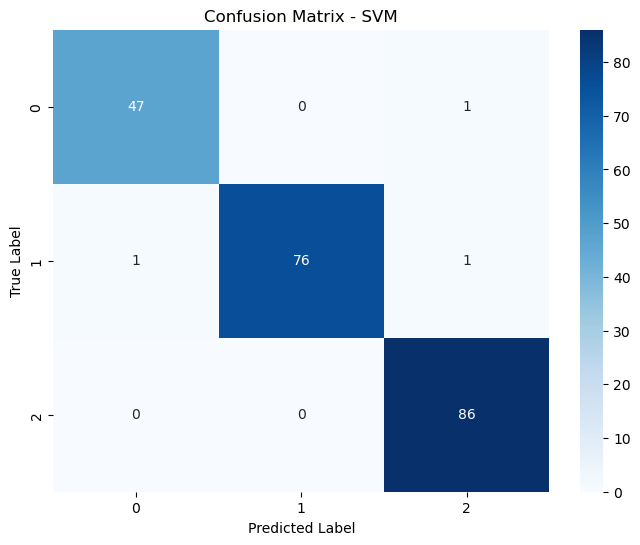

In [404]:
# Split your dataset into training and testing sets

model_name = 'XGB'
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier and set the desired hyperparameters
model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic'
)

# Train the model on the training data
model.fit(X_train, y_train)

# (Optional) Evaluate the performance of your trained model
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)

# Print the accuracy
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 11.2 XGB Model By K-Fold Approach

In [405]:
# Perform k-fold cross-validation
scores = cross_val_score(model, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.96226415 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean accuracy: 0.996


In [406]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 12. Linear Discriminant Analysis Model

### 12.1 Linear Discriminant Analysis Model Model By 20/80 Testing and Training approach

Accuracy: 0.755

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        48
           1       0.83      0.69      0.76        78
           2       0.79      0.90      0.84        86

    accuracy                           0.75       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.76      0.75      0.75       212

Confusion Matrix:
[[29  7 12]
 [16 54  8]
 [ 5  4 77]]


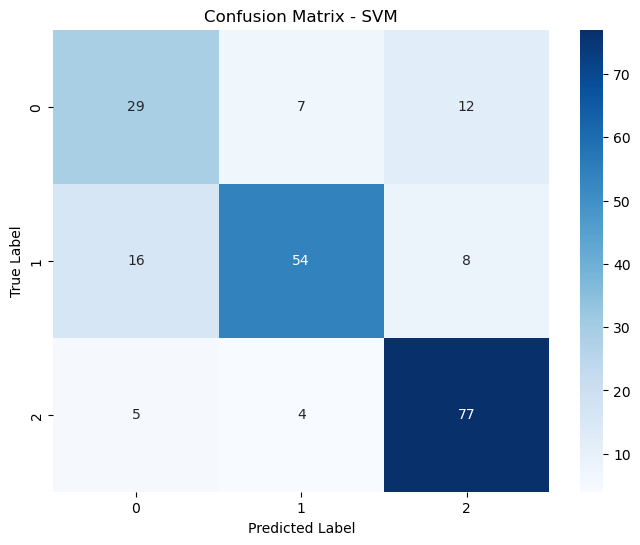

In [407]:
# LinearDiscriminantAnalysis

model_name = 'LDA'
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the model to your training data
lda.fit(X_train, y_train)

# Make predictions on new data
y_pred = lda.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 12.2 Linear Discriminant Analysis Model By K-Fold Approach

In [408]:
# Perform k-fold cross-validation
scores = cross_val_score(lda, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.75471698 0.75471698 0.76415094 0.74528302 0.72641509 0.71698113
 0.77358491 0.76415094 0.74528302 0.73333333]
Mean accuracy: 0.748


In [409]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 13. KNN Model

### 13.1 KNN Model By 20/80 Testing and Training approach

Accuracy: 0.991

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        48
           1       0.83      0.69      0.76        78
           2       0.79      0.90      0.84        86

    accuracy                           0.75       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.76      0.75      0.75       212

Confusion Matrix:
[[29  7 12]
 [16 54  8]
 [ 5  4 77]]


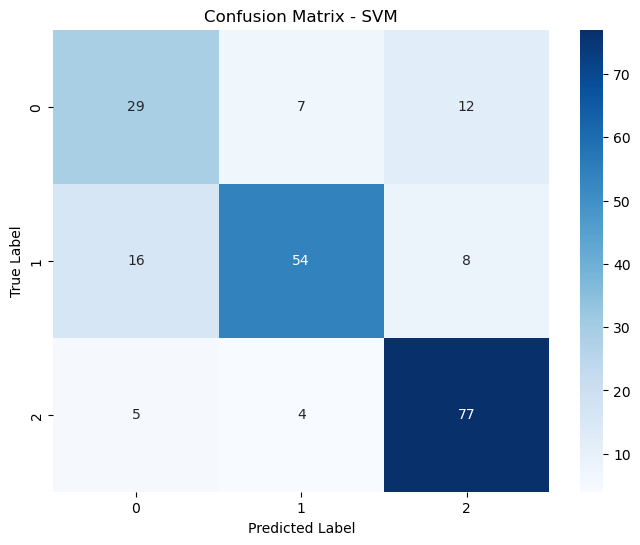

In [410]:
# KNN

model_name = 'KNN'
# Assuming X contains the features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

accuracy = round(knn.score(X_test_scaled, y_test), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 13.2 KNN Model By K-Fold Approach

In [411]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
# Perform k-fold cross-validation
scores = cross_val_score(knn, X_scaled, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.99056604 1.         1.         1.         1.         0.98113208
 1.         1.         0.99056604 0.99047619]
Mean accuracy: 0.995


In [412]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 14. Logistic Regression Model

### 14.1 Logistic Regression Model By 20/80 Testing and Training approach

C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.698

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        48
           1       0.67      0.77      0.72        78
           2       0.77      0.85      0.81        86

    accuracy                           0.70       212
   macro avg       0.66      0.64      0.64       212
weighted avg       0.68      0.70      0.68       212

Confusion Matrix:
[[15 21 12]
 [ 8 60 10]
 [ 5  8 73]]


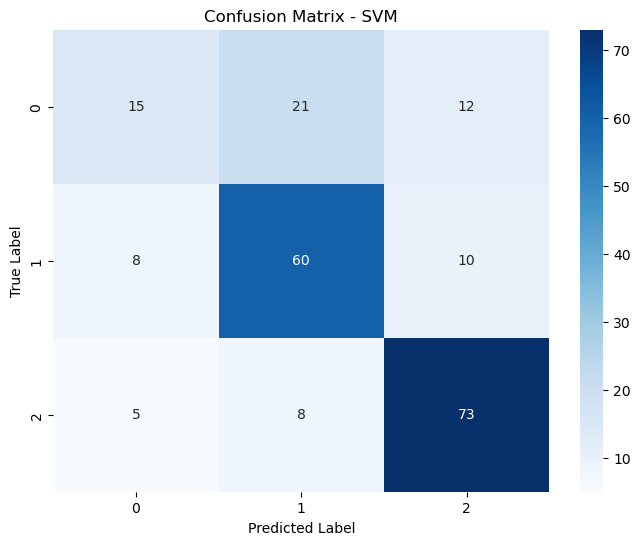

In [413]:
# Logistic Regression

model_name = 'Logistic Regression'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 14.2 Logistic Regression Model By K-Fold Approach

In [414]:
scores = cross_val_score(logreg, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Accuracy scores for each fold: [0.76415094 0.73584906 0.75471698 0.72641509 0.74528302 0.72641509
 0.71698113 0.68867925 0.74528302 0.74285714]
Mean accuracy: 0.735


C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [415]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 15 Ada Boost Model

### 15.1 Ada Boost Model By 20/80 Testing and Training approach

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        48
           1       0.67      0.77      0.72        78
           2       0.77      0.85      0.81        86

    accuracy                           0.70       212
   macro avg       0.66      0.64      0.64       212
weighted avg       0.68      0.70      0.68       212

Confusion Matrix:
[[15 21 12]
 [ 8 60 10]
 [ 5  8 73]]


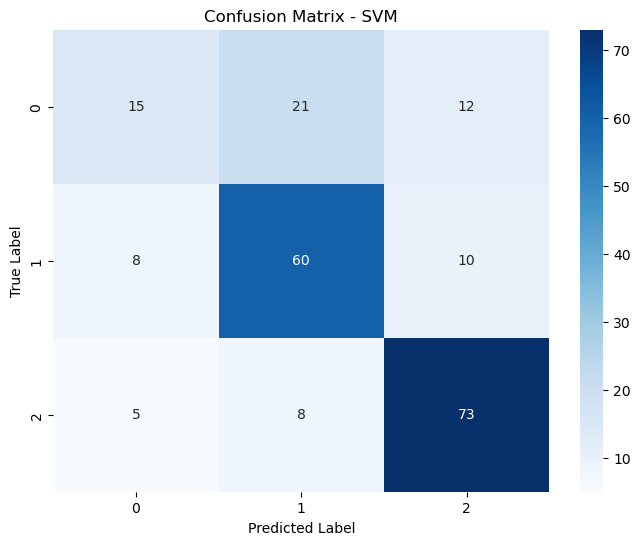

In [416]:
# Ada boost

model_name = 'Ada Boost'
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

# Step 3: Create an instance of AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Step 4: Train the AdaBoostClassifier on the training data
ada_boost.fit(X_train, y_train)

# Step 5: Evaluate the performance of the trained model on the test data
accuracy = round(ada_boost.score(X_test, y_test), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 15.2 Ada Boost Model By K-Fold Approach

In [417]:
scores = cross_val_score(ada_boost, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.90566038 0.93396226 0.94339623 0.9245283  0.94339623 0.93396226
 0.9245283  0.9245283  0.9245283  0.9047619 ]
Mean accuracy: 0.926


In [418]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 16. Quadratic Discriminant Analysis Model

### 16.1 Quadratic Discriminant Analysis Model By 20/80 Testing and Training approach

Accuracy: 0.929

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        48
           1       0.67      0.77      0.72        78
           2       0.77      0.85      0.81        86

    accuracy                           0.70       212
   macro avg       0.66      0.64      0.64       212
weighted avg       0.68      0.70      0.68       212

Confusion Matrix:
[[15 21 12]
 [ 8 60 10]
 [ 5  8 73]]


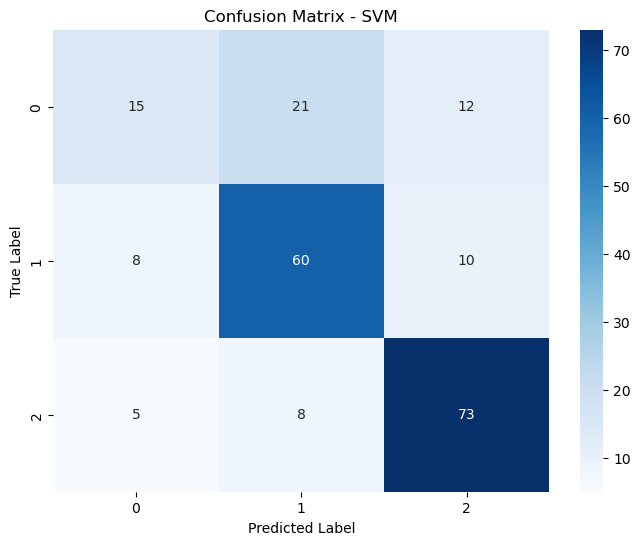

In [419]:
# Quadratic Discriminant Analysis (QDA)

model_name = 'QDA'

# Create an instance of QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

# Fit the model to your data
qda.fit(X, y.ravel())
accuracy = round(qda.score(X_test, y_test.ravel()), 3)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 16.2 Quadratic Discriminant Analysis Model By K-Fold Approach

In [420]:
# Perform k-fold cross-validation
scores = cross_val_score(qda, X, y.ravel(), cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy score
mean_accuracy = round(scores.mean(), 3)
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.83962264 0.95283019 0.95283019 0.93396226 0.97169811 0.95283019
 0.96226415 0.93396226 0.98113208 0.98095238]
Mean accuracy: 0.946


C:\Users\HP\.conda\envs\tf\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [421]:
# Storing data for comparison at the end
result.loc[len(result)] = [model_name, accuracy, mean_accuracy]

## 17. Application Phase

In [422]:
with open('id3_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

# Take input values from the user
pH = float(input("Enter pH value: "))
temperature = float(input("Enter temperature: "))
taste = input("Enter taste: ")
odor = input("Enter odor: ")
fat = float(input("Enter fat content: "))
turbidity = float(input("Enter turbidity: "))
colour = input("Enter color: ")

user_input = np.array([[pH, temperature, taste, odor, fat , turbidity, colour]])

# Make predictions using the loaded model
prediction = loaded_model.predict(user_input)
if prediction == 0:
    print("Milk Quality is high")
elif prediction == 1:
    print("Milk Quality is low")
elif prediction == 2:
    print("Milk Quality is medium")

# Print the prediction
print("Prediction:", prediction)

Enter pH value: 6
Enter temperature: 32
Enter taste: 1
Enter odor: 0
Enter fat content: 1
Enter turbidity: 0
Enter color: 245
Milk Quality is low
Prediction: [1]


In [423]:
print(result)

                  Model     Score  K-Fold Mean Score
0                   SVM  0.958000              0.956
1         Random Forest  0.995000              0.998
2           Naive Bayes  0.980952              0.926
3                   MLP  0.741000              0.778
4                   ID3  1.000000              0.995
5                   XGB  0.986000              0.996
6                   LDA  0.755000              0.748
7                   KNN  0.991000              0.995
8   Logistic Regression  0.698000              0.735
9             Ada Boost  0.910000              0.926
10                  QDA  0.929000              0.946


## 18. Line chart

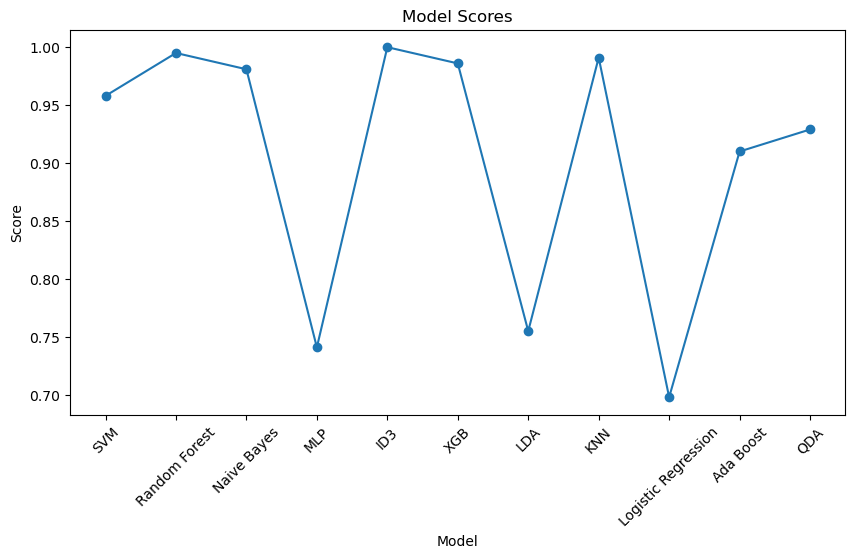

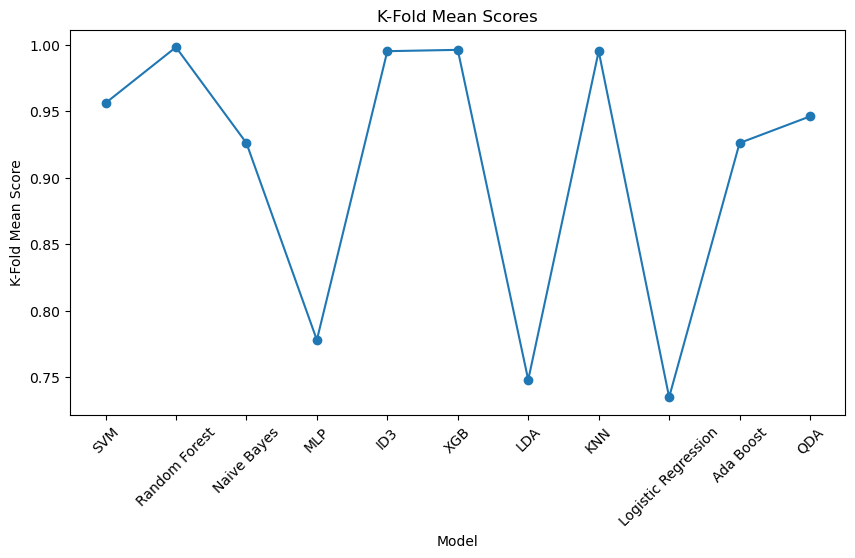

In [425]:
plt.figure(figsize=(10, 5))
plt.plot(result['Model'], result['Score'], marker='o')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(result['Model'], result['K-Fold Mean Score'], marker='o')
plt.xlabel('Model')
plt.ylabel('K-Fold Mean Score')
plt.title('K-Fold Mean Scores')
plt.xticks(rotation=45)
plt.show()

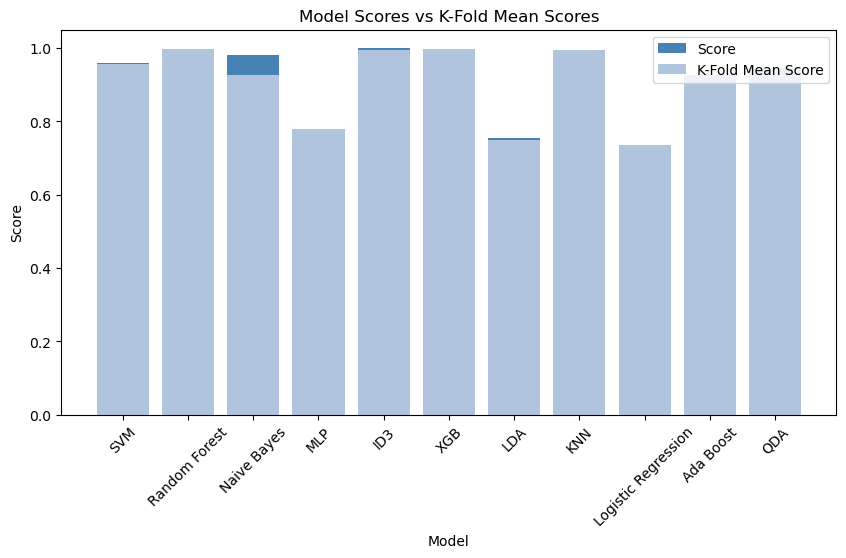

In [429]:
# Data
models = result['Model']
score = result['Score']
kfold_mean_score = result['K-Fold Mean Score']

# Define colors
bar_color = 'steelblue'
mean_score_color = 'lightsteelblue'

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(models, score, label='Score', color=bar_color)
plt.bar(models, kfold_mean_score, label='K-Fold Mean Score', color=mean_score_color)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores vs K-Fold Mean Scores')
plt.legend()
plt.xticks(rotation=45)
plt.show()
